In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import konlpy
import wordcloud
import selenium
import warnings
import openpyxl
import time
warnings.filterwarnings('ignore')

from konlpy.tag import Okt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from matplotlib import font_manager
from bs4 import BeautifulSoup
from openpyxl import Workbook

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService


In [92]:
# 한글깨짐 방지
import matplotlib as mpl

mpl.rc('font', family = 'AppleGothic')

In [93]:
# 화질수정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [20]:
url = 'https://finance.naver.com/sise/sise_group_detail.naver?type=theme&no=525'
driver = webdriver.Chrome('Data Science/Project/Cp2/chromedriver')
driver.implicitly_wait(5)
driver.get(url)

In [21]:
# 시가총액
check1 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[4]/input')

# 매출액
check2 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[4]/td[4]/input')

# 영업이익
check3 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[5]/input')

# 당기순이익
check4 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[3]/td[5]/input')

# PER(배)
check5 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[6]/input')

# PBR(배)
check6 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[4]/td[5]/input')

# 거래량
check7 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[1]/input')

# 매수호가
check8 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[2]/input')

# 매도호가
check9 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[2]/td[2]/input')

# 거래대금
check10 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[1]/td[3]/input')

# 전일거래량
check11 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/table/tbody/tr[2]/td[3]/input')

# 적용
check12 = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[2]/div[3]/form/div/div/div/a[1]')

check1.click()
check2.click()
check3.click()
check4.click()
check5.click()
check6.click()
check7.click()
check8.click()
check9.click()
check10.click()
check11.click()
check12.click()

time.sleep(1.5)

driver.execute_script('window.scrollTo(0,800)')
time.sleep(3)

In [22]:
all_scroll_size = driver.execute_script('return document.documentElement.scrollHeight')
print('전체 스크롤 사이즈 : ', all_scroll_size)

전체 스크롤 사이즈 :  1257


In [23]:
df = pd.DataFrame(columns = ['기업코드', '기업명', '내용', '현재가', '전일비', '등락율', '시가총액(억)', 
                             '매출액', '영업이익', '당기순이익', 'PER', 'PBR'])

In [24]:
data0 = [] # companycode
data1 = [] # name
data2 = [] # contents
currentprice = [] # 현재가
percentage_change = [] # 전일비
updown_percentage = [] # 등락율
market_capitalization = [] # 시가총액
sales = [] # 매출액
operating_profit = [] # 영업이익
net_income = [] # 단기순이익
price_earning_ratio = [] # PER
price_book_value_ratio = [] # PBR

In [25]:
for n in range(1,51):
    print(f'{n}번째 크롤링')
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    info = soup.select(f'#contentarea > div:nth-child(5) > table > tbody > tr:nth-child({n})')
    
    for i in info:
        code = i.find('a')['href'].split('code=')[1]
        name = i.find('a').text
        contents = i.find('p', {'class':'info_txt'}).text
        
        value1 = i.find('td', {'class':'number'}).text
        value2 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(4) > span').text.replace('\n', '').replace('\t', '')
        value3 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(5) > span').text.replace('\n', '').replace('\t', '')
        value4 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(6)').text
        value5 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(7)').text
        value6 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(8)').text
        value7 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(9)').text
        value8 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(10)').text
        value9 = i.select_one('#contentarea > div:nth-child(5) > table > tbody > tr > td:nth-child(11)').text
    
        data0.append(code)
        data1.append(name)
        data2.append(contents)
    
        currentprice.append(value1)
        percentage_change.append(value2)
        updown_percentage.append(value3)
        market_capitalization.append(value4)
        sales.append(value5)
        operating_profit.append(value6)
        net_income.append(value7)
        price_earning_ratio.append(value8)
        price_book_value_ratio.append(value9)
    
        df = {'기업코드' : data0, '기업명' : data1, '내용' : data2, '현재가' : currentprice, '전일비' : percentage_change, '등락율' : updown_percentage,
          '시가총액(억)' : market_capitalization, '매출액' : sales, '영업이익' : operating_profit, '당기순이익' : net_income, 'PER' : price_earning_ratio, 'PBR' : price_book_value_ratio}
    
        drive_df = pd.DataFrame(df)
        df_final = pd.concat([drive_df])

1번째 크롤링
2번째 크롤링
3번째 크롤링
4번째 크롤링
5번째 크롤링
6번째 크롤링
7번째 크롤링


TypeError: 'NoneType' object is not subscriptable

In [26]:
df_final

,기업코드,기업명,내용,현재가,전일비,등락율,시가총액(억),매출액,영업이익,당기순이익,PER,PBR
0,381970,케이카,중고차 유통 업체로 21년2월 조이렌트카를 흡수 합병하여 차량 렌탈 사업(렌터카 사...,"12,750",300,+2.41%,"6,131","19,024",711,468,686,18.59
1,068400,SK렌터카,SK그룹 계열의 국내 상위권 렌터카 업체. 수요에 응하여 유상으로 자동차를 임대하는...,"7,050",50,+0.71%,"3,334","10,369",791,206,476,14.81
2,001740,SK네트웍스,종속회사 SK렌터카가 자동차 대여 사업을 영위중.,"4,100",15,+0.37%,"10,176","110,181","1,220","1,035",156,26.28
3,038390,레드캡투어,"여행 및 렌터카 사업 영위. 렌터카 사업부문은 차량대여 서비스, 중고차량의 매매 등...","19,550",50,+0.26%,"1,679","2,289",205,121,"2,144",9.12
4,089860,롯데렌탈,롯데그룹 계열의 렌탈 전문업체. 차량렌탈 및 중고차 매매업이 중심이 되는 차량렌탈 ...,"28,150",50,-0.18%,"10,312","24,227","2,455","1,136","2,752",10.23
5,403550,쏘카,카셰어링 사업 영위중. 카셰어링은 언제 어디서나 10분 단위로 원하는 만큼 원하는 ...,"21,550",700,-3.15%,"7,052","2,890",-210,63,236,91.31


In [15]:
import os
print(os.getcwd())

/Users/Lim/Data Science/Project/Cp2


In [16]:
os.chdir('/Users/Lim/Data Science/Project/Cp2')

In [27]:
df_final.to_csv('rentcarcompany.csv')

In [ ]:
wb = openpyxl.Workbook()
sheet = wb.active

In [31]:
df1 = pd.read_csv('rentcarcompany.csv')
df1

,Unnamed: 0,기업코드,기업명,내용,현재가,전일비,등락율,시가총액(억),매출액,영업이익,당기순이익,PER,PBR
0,0,381970,케이카,중고차 유통 업체로 21년2월 조이렌트카를 흡수 합병하여 차량 렌탈 사업(렌터카 사...,"12,750",300,+2.41%,"6,131","19,024",711,468,686,18.59
1,1,68400,SK렌터카,SK그룹 계열의 국내 상위권 렌터카 업체. 수요에 응하여 유상으로 자동차를 임대하는...,"7,050",50,+0.71%,"3,334","10,369",791,206,476,14.81
2,2,1740,SK네트웍스,종속회사 SK렌터카가 자동차 대여 사업을 영위중.,"4,100",15,+0.37%,"10,176","110,181","1,220","1,035",156,26.28
3,3,38390,레드캡투어,"여행 및 렌터카 사업 영위. 렌터카 사업부문은 차량대여 서비스, 중고차량의 매매 등...","19,550",50,+0.26%,"1,679","2,289",205,121,"2,144",9.12
4,4,89860,롯데렌탈,롯데그룹 계열의 렌탈 전문업체. 차량렌탈 및 중고차 매매업이 중심이 되는 차량렌탈 ...,"28,150",50,-0.18%,"10,312","24,227","2,455","1,136","2,752",10.23
5,5,403550,쏘카,카셰어링 사업 영위중. 카셰어링은 언제 어디서나 10분 단위로 원하는 만큼 원하는 ...,"21,550",700,-3.15%,"7,052","2,890",-210,63,236,91.31


In [33]:
df1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [34]:
df1

,기업코드,기업명,내용,현재가,전일비,등락율,시가총액(억),매출액,영업이익,당기순이익,PER,PBR
0,381970,케이카,중고차 유통 업체로 21년2월 조이렌트카를 흡수 합병하여 차량 렌탈 사업(렌터카 사...,"12,750",300,+2.41%,"6,131","19,024",711,468,686,18.59
1,68400,SK렌터카,SK그룹 계열의 국내 상위권 렌터카 업체. 수요에 응하여 유상으로 자동차를 임대하는...,"7,050",50,+0.71%,"3,334","10,369",791,206,476,14.81
2,1740,SK네트웍스,종속회사 SK렌터카가 자동차 대여 사업을 영위중.,"4,100",15,+0.37%,"10,176","110,181","1,220","1,035",156,26.28
3,38390,레드캡투어,"여행 및 렌터카 사업 영위. 렌터카 사업부문은 차량대여 서비스, 중고차량의 매매 등...","19,550",50,+0.26%,"1,679","2,289",205,121,"2,144",9.12
4,89860,롯데렌탈,롯데그룹 계열의 렌탈 전문업체. 차량렌탈 및 중고차 매매업이 중심이 되는 차량렌탈 ...,"28,150",50,-0.18%,"10,312","24,227","2,455","1,136","2,752",10.23
5,403550,쏘카,카셰어링 사업 영위중. 카셰어링은 언제 어디서나 10분 단위로 원하는 만큼 원하는 ...,"21,550",700,-3.15%,"7,052","2,890",-210,63,236,91.31


In [35]:
df1.to_csv('rentcarcompanies.csv')

In [40]:
# Konlpy 키워드 분석

df2 = open('국내 자동차 산업구조변화.txt', encoding = 'UTF-8').read()
df2

'연구자료 2021-10\n\n\n\n\n텍스트 분석을 통해 본 국내 자동차\n산업구조 변화\n송명구ㆍ김경유ㆍ안소현\n\x0c\x0c차례\n\n\n요약 ·······································································································9\n\n\n제1장 서론 ·················································································13\n           1. 연구의 배경 및 필요성 ····························································13\n           2. 선행연구 검토 ········································································17\n           3. 연구의 목적 및 필요성 ····························································19\n\n\n제2장 글로벌 자동차 산업구조 변화 ···············································21\n           1. 자동차산업 패러다임의 변화 ···················································21\n           2. 자동차산업 패러다임 변화에 따른 기업 대응 현황 ···················29\n\n\n제3장 텍스트 분석을 통한 국내 자동차산업 참여기업 식별 ···············40\n           1. 연구자료 및 분석 방법 ····························································40\n              (1) 연구자료 ·········································

In [41]:
# 불필요한 문자 제거
import re
df2 = re.sub('[^가-힣]', ' ', df2)
df2

'연구자료             텍스트 분석을 통해 본 국내 자동차 산업구조 변화 송명구 김경유 안소현   차례   요약                                                                                                            제 장 서론                                                                                                   연구의 배경 및 필요성                                                                              선행연구 검토                                                                                          연구의 목적 및 필요성                                                                  제 장 글로벌 자동차 산업구조 변화                                                                 자동차산업 패러다임의 변화                                                                     자동차산업 패러다임 변화에 따른 기업 대응 현황                         제 장 텍스트 분석을 통한 국내 자동차산업 참여기업 식별                                 연구자료 및 분석 방법                                                                                  연구자료                                                                           

In [46]:
# hannanum 생성
#hannanum = konlpy.tag.Hannanum()
twitter = konlpy.tag.Twitter()

In [47]:
nouns = twitter.nouns(df2)
nouns

['연구',
 '자료',
 '텍스트',
 '분석',
 '통해',
 '국내',
 '자동차',
 '산업',
 '구조',
 '변화',
 '송',
 '명구',
 '김',
 '경유',
 '안소현',
 '차례',
 '요약',
 '제',
 '장',
 '서론',
 '연구',
 '배경',
 '및',
 '필요성',
 '선행',
 '연구',
 '검토',
 '연구',
 '목적',
 '및',
 '필요성',
 '제',
 '장',
 '글로벌',
 '자동차',
 '산업',
 '구조',
 '변화',
 '자동차',
 '산업',
 '패러다임',
 '변화',
 '자동차',
 '산업',
 '패러다임',
 '변화',
 '기업',
 '대응',
 '현황',
 '제',
 '장',
 '텍스트',
 '분석',
 '통한',
 '국내',
 '자동차',
 '산업',
 '참여',
 '기업',
 '식별',
 '연구',
 '자료',
 '및',
 '분석',
 '방법',
 '연구',
 '자료',
 '분석',
 '방법',
 '분석',
 '결과',
 '제',
 '장',
 '자동차',
 '산업',
 '참여',
 '기업',
 '특성',
 '및',
 '국내',
 '자동차',
 '산업',
 '구조',
 '변화',
 '시장',
 '참여자',
 '변화',
 '통해',
 '자동차',
 '산업',
 '구조',
 '변화',
 '자동차',
 '산업',
 '참여',
 '기업',
 '산업',
 '분류',
 '분포',
 '변화',
 '자동차',
 '산업',
 '신규',
 '참여',
 '기업',
 '현황',
 '재무',
 '지표',
 '통해',
 '국내',
 '자동차',
 '산업',
 '구조',
 '변화',
 '년',
 '기준',
 '표본',
 '기업',
 '재무',
 '현황',
 '자동차',
 '산업',
 '참여',
 '기업',
 '재무',
 '지표',
 '변화',
 '추이',
 '제',
 '장',
 '결론',
 '및',
 '시사',
 '점',
 '결론',
 '시사',
 '점',
 '참고문헌',
 '부록',
 '표',
 '차례',
 '표',
 '사

In [48]:
df2_word = pd.DataFrame({'word' : nouns})
df2_word

,word
0,연구
1,자료
2,텍스트
3,분석
4,통해
...,...
8074,성장
8075,성도
8076,둔화
8077,것


In [49]:
df2_word['count'] = df2_word['word'].str.len()
df2_word

,word,count
0,연구,2
1,자료,2
2,텍스트,3
3,분석,2
4,통해,2
...,...,...
8074,성장,2
8075,성도,2
8076,둔화,2
8077,것,1


In [50]:
# 두 글자 이상만 남기기
df2_word = df2_word.query('count >= 2')
df2_word.sort_values('count')

,word,count
0,연구,2
5164,산업,2
5162,국내,2
5161,통한,2
5160,분석,2
...,...,...
7534,소프트웨어,5
2365,이니셔티브,5
3883,인스트루먼트,6
2787,인포테인먼트,6


In [51]:
# 단어의 빈도 구하기
df2_word = df2_word.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)

In [52]:
df2_word

,word,n
358,산업,433
608,자동차,421
121,기업,268
352,사업,134
300,변화,133
...,...,...
427,수치,1
424,수정,1
422,수의,1
417,수단,1


In [53]:
top20_words = df2_word.head(20)
top20_words

,word,n
358,산업,433
608,자동차,421
121,기업,268
352,사업,134
300,변화,133
748,참여,129
328,분류,106
330,분석,98
91,구조,87
95,국내,83


In [54]:
font = 'DoHyeon-Regular.ttf'

In [56]:
dic_word = df2_word.set_index('word').to_dict()['n']
dic_word

{'산업': 433,
 '자동차': 421,
 '기업': 268,
 '사업': 134,
 '변화': 133,
 '참여': 129,
 '분류': 106,
 '분석': 98,
 '구조': 87,
 '국내': 83,
 '텍스트': 78,
 '식별': 77,
 '통해': 76,
 '영역': 68,
 '자율': 66,
 '업체': 61,
 '해당': 59,
 '확대': 58,
 '제조업': 57,
 '현황': 56,
 '표준': 56,
 '주행': 55,
 '기준': 53,
 '분야': 50,
 '부품': 49,
 '보고서': 48,
 '관련': 47,
 '서비스': 45,
 '시장': 44,
 '사용': 44,
 '기술': 42,
 '자료': 42,
 '소프트웨어': 41,
 '방법론': 40,
 '확장': 39,
 '기존': 39,
 '내용': 39,
 '기반': 39,
 '증가': 39,
 '차량': 38,
 '활용': 34,
 '신규': 32,
 '개발': 31,
 '워드': 30,
 '연구': 30,
 '비중': 30,
 '영위': 29,
 '패러다임': 28,
 '파악': 27,
 '전기차': 27,
 '친환경': 25,
 '글로벌': 24,
 '전체': 23,
 '포함': 22,
 '진입': 22,
 '명사': 22,
 '기타': 21,
 '전기': 21,
 '연도': 21,
 '미래': 21,
 '빈도': 21,
 '제출': 20,
 '전자': 20,
 '판매': 19,
 '시스템': 19,
 '위해': 19,
 '수요': 19,
 '재무': 18,
 '제외': 18,
 '전환': 17,
 '결과': 17,
 '대한': 17,
 '작성': 17,
 '참여자': 17,
 '행차': 16,
 '성장': 16,
 '통한': 16,
 '자동': 16,
 '판단': 16,
 '전망': 16,
 '특성': 16,
 '최근': 15,
 '완성': 15,
 '규모': 15,
 '트렌드': 14,
 '대응': 14,
 '주요': 14,
 '기초': 14,
 '분포': 1

In [57]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1111,
               font_path = font,
               width = 400,
               height = 400,
               background_color = 'white')

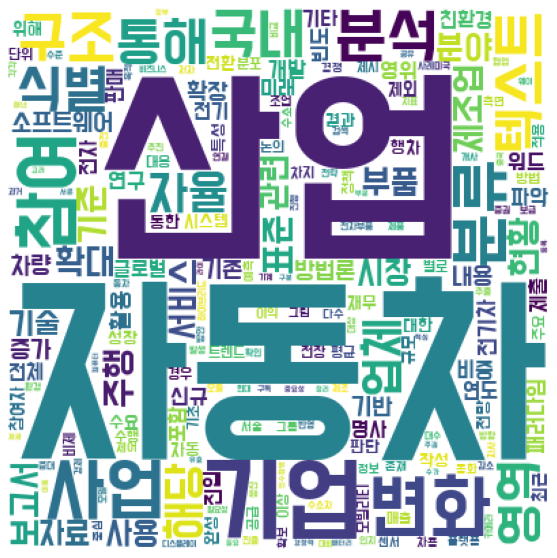

In [58]:
# generate wordcloud
img_wordcloud = wc.generate_from_frequencies(dic_word)

# print wordcloud
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [60]:
geomap = pd.read_csv('geoMap2.csv')
geomap

,지역,관심도
0,제주특별자치도,100
1,서울특별시,52
2,경기도,43
3,대전광역시,41
4,인천광역시,37
5,부산광역시,35
6,강원도,34
7,충청남도,32
8,전라남도,32
9,대구광역시,31


In [70]:
citydata = pd.read_csv('전국렌터카업체정보표준데이터.csv', encoding = 'cp949')
citydata

,업체명,사업장구분,소재지도로명주소,소재지지번주소,위도,경도,차고지도로명주소,차고지지번주소,보유차고지수용능력,자동차총보유대수,...,주말운영종료시각,공휴일운영시작시각,공휴일운영종료시각,휴무일,홈페이지주소,대표자명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,㈜디디렌트카,주사업장,서울특별시 노원구 동일로250길 69(상계동),NaN,37.682856,127.059089,"서울특별시 노원구 상계동 1227, 1229, 1230",NaN,NaN,60,...,NaN,NaN,NaN,NaN,NaN,NaN,02-937-9963,2022-08-17,3100000,서울특별시 노원구
1,인천공항렌트카㈜,주사업장,서울특별시 노원구 동일로 178길 10 201호(공릉동),NaN,37.621287,127.075141,서울특별시 양천구 목동서로 225,NaN,NaN,66,...,NaN,NaN,NaN,NaN,NaN,NaN,02-1599-2924,2022-08-17,3100000,서울특별시 노원구
2,㈜엠씨렌트카,주사업장,경기도 안양시 동안구 경수대로 483,경기도 안양시 동안구 호계동 975-3,37.366025,126.957847,"경기도 안양시 동안구 관평로170번길 43, 4~6층,8층",0,60.0,60,...,23:39,00:00,23:39,연중무휴,NaN,장성환,031-429-0113,2022-06-30,3830000,경기도 안양시
3,뱅카㈜,주사업장,"경기도 안양시 동안구 관평로 175, 3층",경기도 안양시 동안구 관양동 1591-8,37.392223,126.959496,"경기도 안양시 동안구 관평로 175, 지하3층",0,51.0,15,...,23:39,00:00,23:39,연중무휴,NaN,이성찬,031-385-5566,2022-06-30,3830000,경기도 안양시
4,㈜트러스트에스씨,주사업장,"경기도 안양시 동안구 안양판교로 20, 306-C27호",경기도 안양시 동안구 관양동 1505-29,37.400244,126.978058,"경기도 안양시 동안구 관평로170번길 33, 6층",0,50.0,50,...,23:39,00:00,23:39,연중무휴,NaN,조지형,000-000-0000,2022-06-30,3830000,경기도 안양시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,㈜카일이삼제스퍼 인천영업소,영업소,"인천광역시 계양구 용마루3길 2(용종동,지하)",인천광역시 계양구 용종동 222-7(지하),37.445212,126.702475,"인천광역시 남동구 성말로 16, 구월중앙주차장","인천광역시 남동구 구월동 1462 신한파크프라자, 구월중앙주차장",1950.0,486,...,NaN,NaN,NaN,NaN,NaN,송윤화,02-3775-1967,2022-04-20,3170000,서울특별시 금천구
5652,㈜카일이삼제스퍼 인천영업소,영업소,"인천광역시 계양구 용마루3길 2(용종동,지하)",인천광역시 계양구 용종동 222-7(지하),37.445212,126.702475,"인천광역시 남동구 성말로 16, 구월중앙주차장","인천광역시 남동구 구월동 1462 신한파크프라자, 구월중앙주차장",1000.0,266,...,NaN,NaN,NaN,NaN,NaN,송윤화,02-3775-1967,2022-04-20,3170000,서울특별시 금천구
5653,㈜카일이삼제스퍼 세종영업소,영업소,"세종특별자치시 갈매로 351, 5031호 (어진동, 세종에비뉴힐에이)","세종특별자치시 어진동 671, 5031호 (어진동, 세종에비뉴힐에이)",36.495097,127.262165,"세종특별자치시 갈매로 351, 5031호 (어진동, 세종에비뉴힐에이)","세종특별자치시 어진동 671, 5031호 (어진동, 세종에비뉴힐에이)",0.0,0,...,NaN,NaN,NaN,NaN,NaN,송윤화,02-3775-1967,2022-04-20,3170000,서울특별시 금천구
5654,㈜카일이삼제스퍼 울산영업소,영업소,"울산광역시 남구 번영로124번길 21, 2층 (울산비지니스센터, 216호)","울산광역시 남구 달동 1250-10, 2층 (울산비지니스센터, 216호)",35.537062,129.330809,"울산광역시 남구 번영로124번길 21, 2층 (울산비지니스센터, 216호)","울산광역시 남구 달동 1250-10, 2층 (울산비지니스센터, 216호)",0.0,0,...,NaN,NaN,NaN,NaN,NaN,송윤화,02-3775-1967,2022-04-20,3170000,서울특별시 금천구


In [71]:
citydata.drop(['사업장구분', '소재지지번주소', '주말운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '휴무일', '홈페이지주소',
               '대표자명', '전화번호', '데이터기준일자', '제공기관명', '소형차요금', '중형차요금', '대형차요금', '승합차요금', '레저용차요금', '수입차요금', '승용차보유대수', '승합차보유대수', '경차요금', '제공기관코드', '평일운영시작시각', '주말운영시작시각', '평일운영종료시각', '차고지지번주소', '보유차고지수용능력', '전기승용자동차보유대수', '전기승합자동차보유대수'], axis = 1, inplace = True)
citydata

,업체명,소재지도로명주소,위도,경도,차고지도로명주소,자동차총보유대수
0,㈜디디렌트카,서울특별시 노원구 동일로250길 69(상계동),37.682856,127.059089,"서울특별시 노원구 상계동 1227, 1229, 1230",60
1,인천공항렌트카㈜,서울특별시 노원구 동일로 178길 10 201호(공릉동),37.621287,127.075141,서울특별시 양천구 목동서로 225,66
2,㈜엠씨렌트카,경기도 안양시 동안구 경수대로 483,37.366025,126.957847,"경기도 안양시 동안구 관평로170번길 43, 4~6층,8층",60
3,뱅카㈜,"경기도 안양시 동안구 관평로 175, 3층",37.392223,126.959496,"경기도 안양시 동안구 관평로 175, 지하3층",15
4,㈜트러스트에스씨,"경기도 안양시 동안구 안양판교로 20, 306-C27호",37.400244,126.978058,"경기도 안양시 동안구 관평로170번길 33, 6층",50
...,...,...,...,...,...,...
5651,㈜카일이삼제스퍼 인천영업소,"인천광역시 계양구 용마루3길 2(용종동,지하)",37.445212,126.702475,"인천광역시 남동구 성말로 16, 구월중앙주차장",486
5652,㈜카일이삼제스퍼 인천영업소,"인천광역시 계양구 용마루3길 2(용종동,지하)",37.445212,126.702475,"인천광역시 남동구 성말로 16, 구월중앙주차장",266
5653,㈜카일이삼제스퍼 세종영업소,"세종특별자치시 갈매로 351, 5031호 (어진동, 세종에비뉴힐에이)",36.495097,127.262165,"세종특별자치시 갈매로 351, 5031호 (어진동, 세종에비뉴힐에이)",0
5654,㈜카일이삼제스퍼 울산영업소,"울산광역시 남구 번영로124번길 21, 2층 (울산비지니스센터, 216호)",35.537062,129.330809,"울산광역시 남구 번영로124번길 21, 2층 (울산비지니스센터, 216호)",0


In [72]:
citydata.to_csv('citydata.csv')

In [73]:
data = pd.read_csv('rentcarcompanies.csv')
data

,Unnamed: 0,기업코드,기업명,내용,현재가,전일비,등락율,시가총액(억),매출액,영업이익,당기순이익,PER,PBR
0,0,381970,케이카,중고차 유통 업체로 21년2월 조이렌트카를 흡수 합병하여 차량 렌탈 사업(렌터카 사...,"12,750",300,+2.41%,"6,131","19,024",711,468,686,18.59
1,1,68400,SK렌터카,SK그룹 계열의 국내 상위권 렌터카 업체. 수요에 응하여 유상으로 자동차를 임대하는...,"7,050",50,+0.71%,"3,334","10,369",791,206,476,14.81
2,2,1740,SK네트웍스,종속회사 SK렌터카가 자동차 대여 사업을 영위중.,"4,100",15,+0.37%,"10,176","110,181","1,220","1,035",156,26.28
3,3,38390,레드캡투어,"여행 및 렌터카 사업 영위. 렌터카 사업부문은 차량대여 서비스, 중고차량의 매매 등...","19,550",50,+0.26%,"1,679","2,289",205,121,"2,144",9.12
4,4,89860,롯데렌탈,롯데그룹 계열의 렌탈 전문업체. 차량렌탈 및 중고차 매매업이 중심이 되는 차량렌탈 ...,"28,150",50,-0.18%,"10,312","24,227","2,455","1,136","2,752",10.23
5,5,403550,쏘카,카셰어링 사업 영위중. 카셰어링은 언제 어디서나 10분 단위로 원하는 만큼 원하는 ...,"21,550",700,-3.15%,"7,052","2,890",-210,63,236,91.31


In [76]:

hannanum = konlpy.tag.Hannanum()

nouns = hannanum.nouns(data['내용'])
nouns

AssertionError: phrase input should be string, not <class 'pandas.core.series.Series'>

In [80]:
geomap

,지역,관심도
0,제주특별자치도,100
1,서울특별시,52
2,경기도,43
3,대전광역시,41
4,인천광역시,37
5,부산광역시,35
6,강원도,34
7,충청남도,32
8,전라남도,32
9,대구광역시,31


In [94]:
geomap.index = geomap['지역']
geomap.columns.names = ['지역']

In [95]:
geomap.drop(['지역'], axis=1)

지역,관심도
지역,
제주특별자치도,100
서울특별시,52
경기도,43
대전광역시,41
인천광역시,37
부산광역시,35
강원도,34
충청남도,32
전라남도,32


<AxesSubplot:ylabel='지역'>

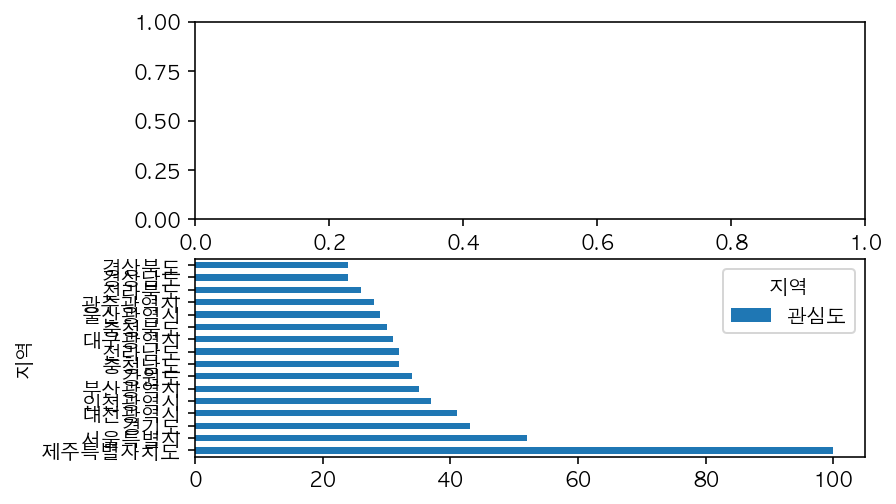

In [99]:
fig, ax = plt.subplots(2)
geomap.plot(kind='barh', ax=ax[1])

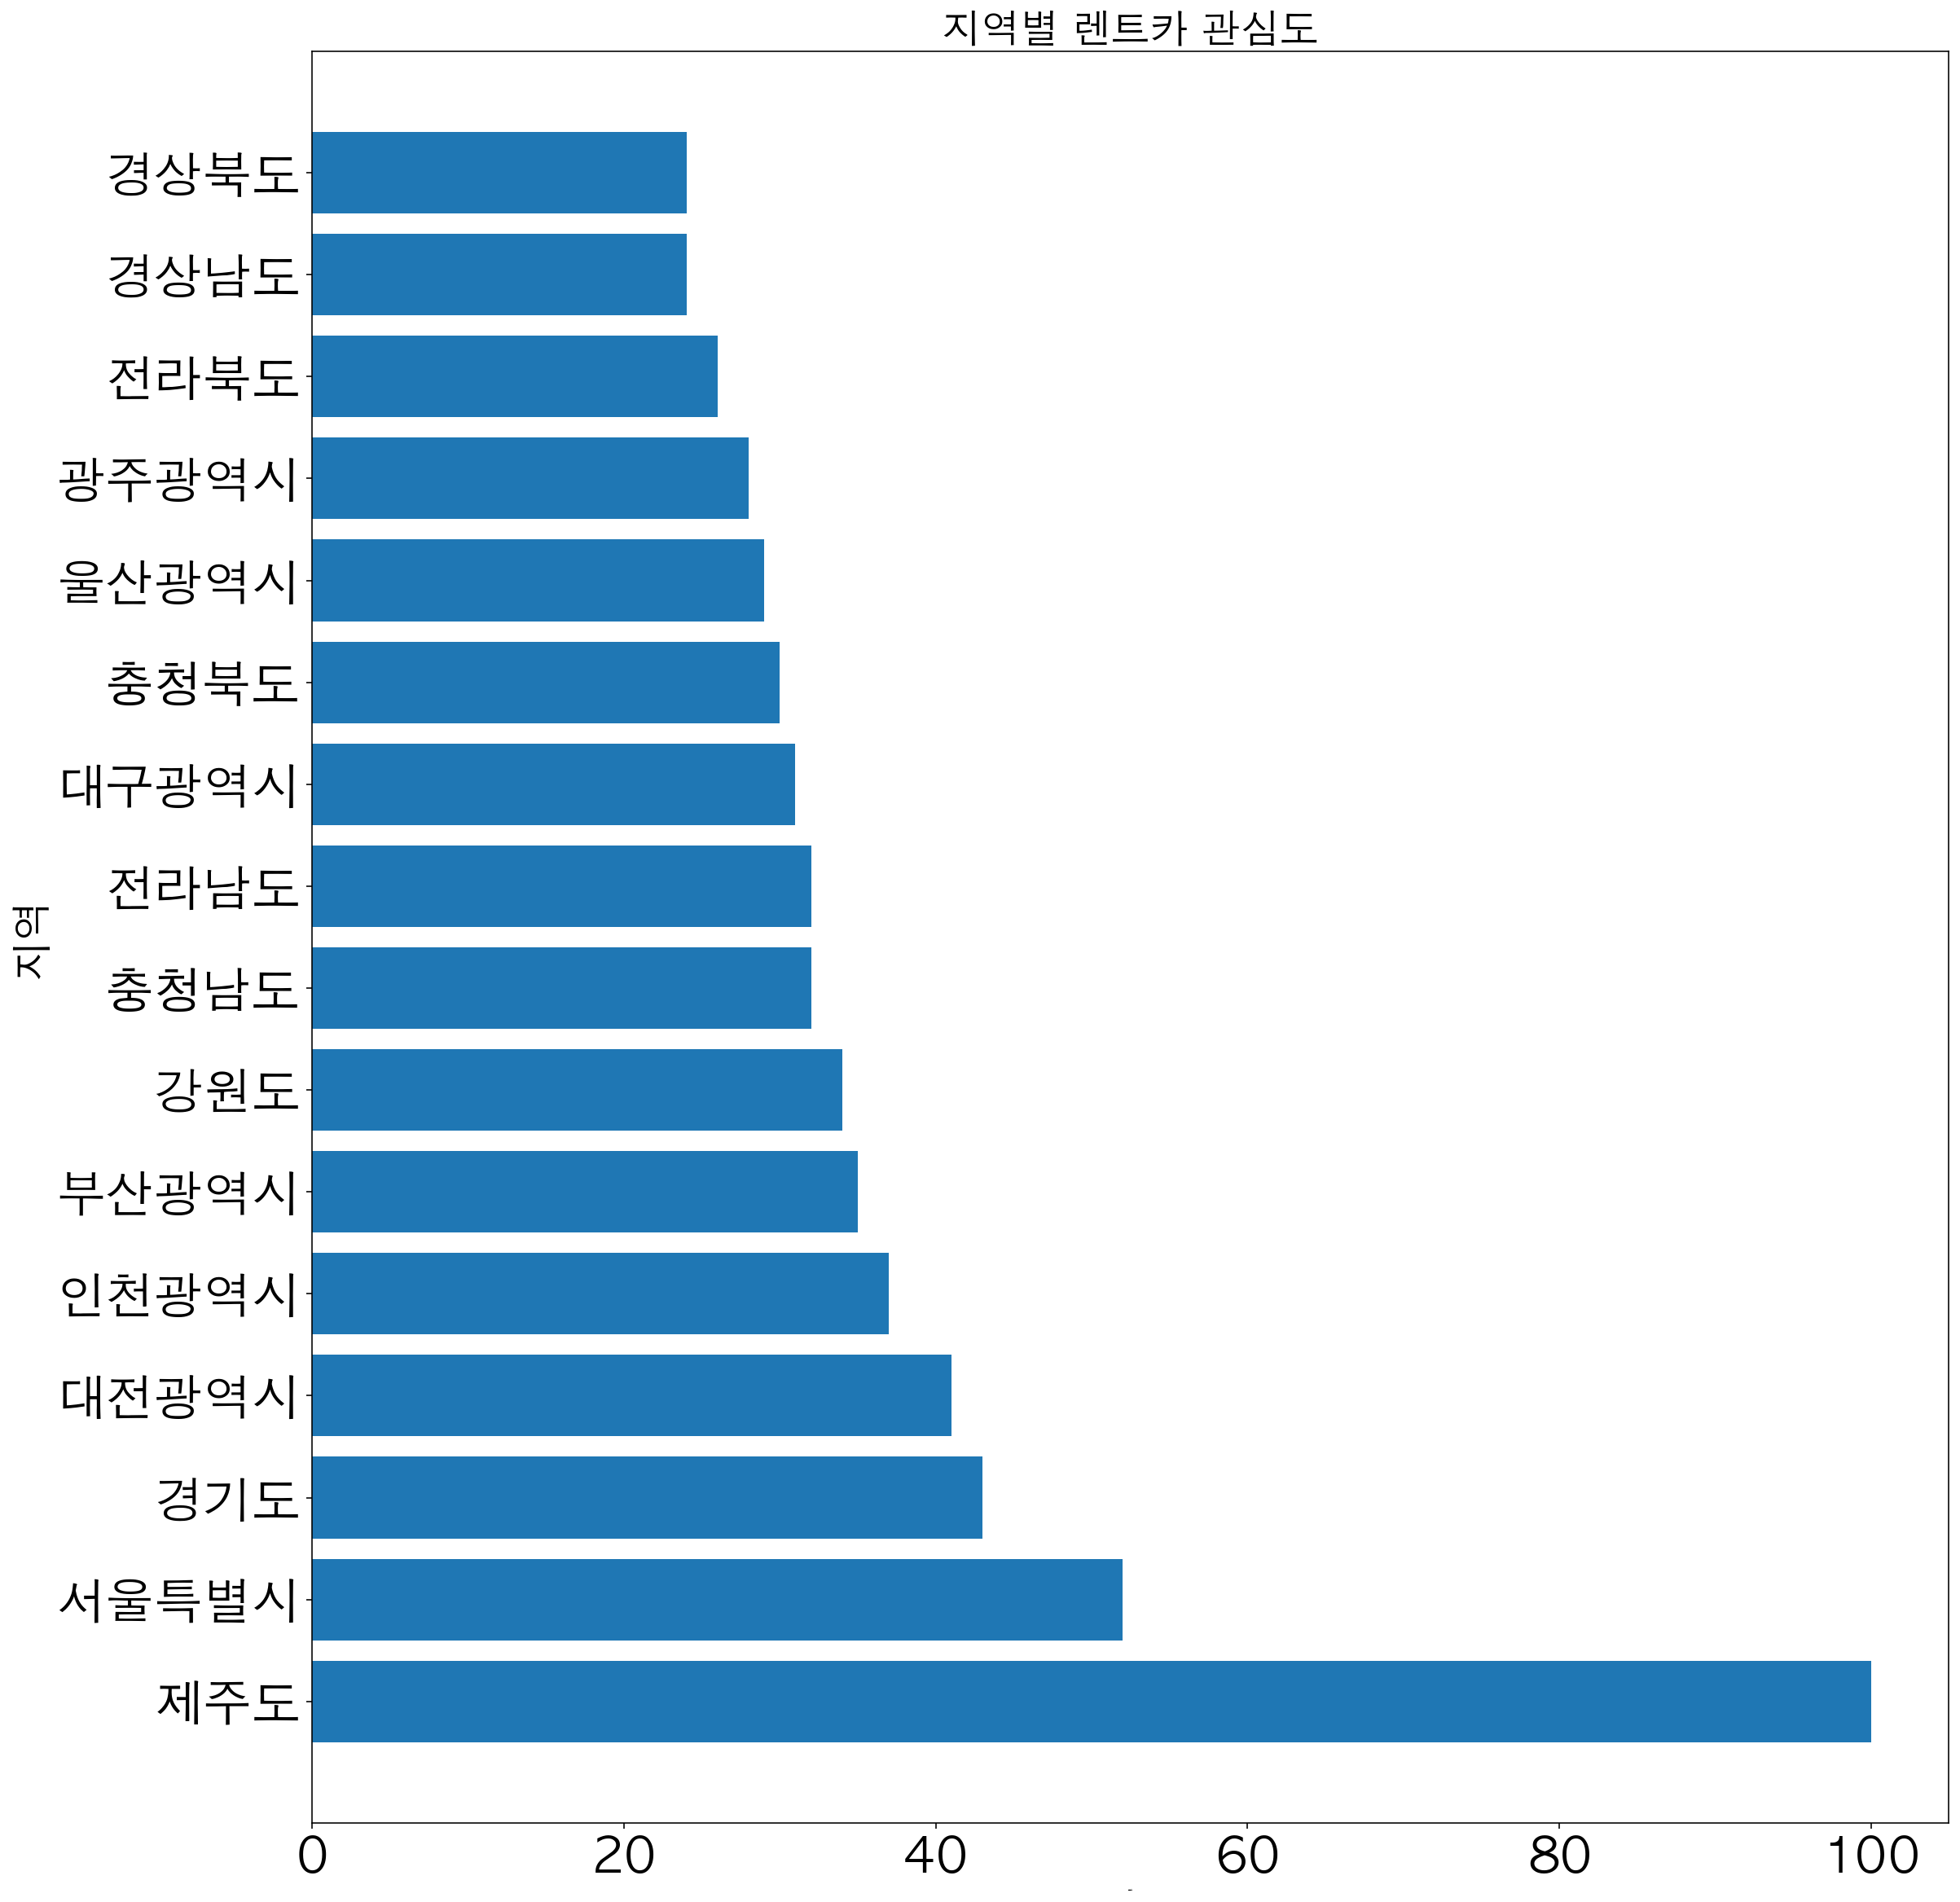

In [121]:
%matplotlib inline
area = ['제주도', '서울특별시', '경기도', '대전광역시', '인천광역시', '부산광역시', '강원도', '충청남도', '전라남도', '대구광역시',
        '충청북도', '울산광역시', '광주광역시', '전라북도', '경상남도', '경상북도']

points = [100, 52, 43, 41, 37, 35, 34, 32, 32, 31, 30, 29, 28, 26, 24, 24]

fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,1,1)

ax1.barh(area, points)
plt.rc('font', size=20)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
plt.xlabel('관심도', fontsize = 1)
plt.ylabel('지역', fontsize = 25)
plt.title('지역별 렌트카 관심도')

plt.savefig('rentarea.png')
plt.show()